<a href="https://colab.research.google.com/github/Tyton25/machine_learning/blob/master/sterlings_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [53]:
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

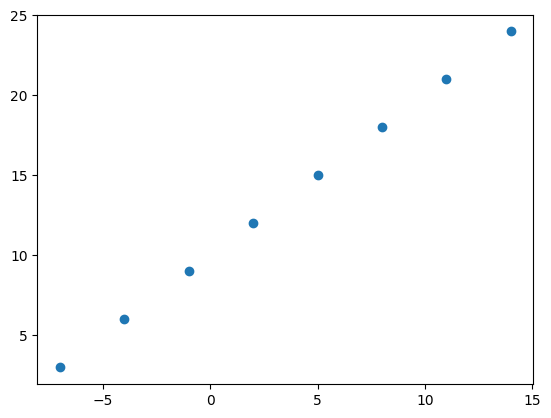

In [54]:
plt.scatter(X,y)

In [55]:
X_train = tf.cast(tf.constant(X), dtype=tf.float32)
y_train = tf.cast(tf.constant(y), dtype=tf.float32)
X_train, y_train

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [56]:
X_train[0].ndim, y_train[0].ndim

(0, 0)

In [61]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

In [68]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 13.0639 - mae: 13.0639
Epoch 2/50
1/1 [==============================] - 0s 14ms/step - loss: 12.0059 - mae: 12.0059
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 10.9463 - mae: 10.9463
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 9.8655 - mae: 9.8655
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 8.7486 - mae: 8.7486
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 7.5839 - mae: 7.5839
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 7.5489 - mae: 7.5489
Epoch 8/50
1/1 [==============================] - 0s 15ms/step - loss: 8.1112 - mae: 8.1112
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 8.5631 - mae: 8.5631
Epoch 10/50
1/1 [==============================] - 0s 13ms/step - loss: 8.4941 - mae: 8.4941
Epoch 11/50
1/1 [==============================] - 0s 13ms/step - loss: 8.0

In [69]:
model.predict([17.0])

1/1 [==============================] - 0s 87ms/step


array([[29.74184]], dtype=float32)